# 🧠 Deel Analytical challenge
## workflow:
1. Exploratory Data Analysis & Data Cleaning
2. Data Analytics & Visualization


**🔧Imports & Data Loading**



In [383]:
#Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [384]:
# Load Data
acceptance_df = pd.read_csv('Data/Globepay Acceptance Report - Globepay Acceptance Report.csv')
chargeback_df = pd.read_csv('Data/Globepay Chargeback Report - Globepay Chargeback Report.csv')

# Backup originals
acceptance_df_backup = acceptance_df.copy()
chargeback_df_backup = chargeback_df.copy()

# Merge the two datasets 
df= pd.merge(acceptance_df, chargeback_df, on='external_ref', how='left')



**🔍 Exploratory Data Analysis & Data cleanining :**



In [385]:
# 1. Basic structure
print(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   external_ref  5430 non-null   object 
 1   status_x      5430 non-null   bool   
 2   source_x      5430 non-null   object 
 3   ref           5430 non-null   object 
 4   date_time     5430 non-null   object 
 5   state         5430 non-null   object 
 6   cvv_provided  5430 non-null   bool   
 7   amount        5430 non-null   float64
 8   country       5430 non-null   object 
 9   currency      5430 non-null   object 
 10  rates         5430 non-null   object 
 11  status_y      5430 non-null   bool   
 12  source_y      5430 non-null   object 
 13  chargeback    5430 non-null   bool   
dtypes: bool(4), float64(1), object(9)
memory usage: 445.6+ KB
None


,external_ref,status_x,source_x,ref,date_time,state,cvv_provided,amount,country,currency,rates,status_y,source_y,chargeback
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01T00:00:00.000Z,DECLINED,False,1020.46,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,""SGD"":1.434,""AUD"":1.648,""GBP"":0.813}",True,GLOBALPAY,False
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01T04:48:00.000Z,ACCEPTED,False,1582.57,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,""SGD"":1.434,""AUD"":1.648,""GBP"":0.813}",True,GLOBALPAY,True
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01T09:36:00.000Z,DECLINED,False,1653.07,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,""SGD"":1.434,""AUD"":1.648,""GBP"":0.813}",True,GLOBALPAY,False
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01T14:24:00.000Z,ACCEPTED,False,2228.17,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,""SGD"":1.434,""AUD"":1.648,""GBP"":0.813}",True,GLOBALPAY,True
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01T19:12:00.000Z,ACCEPTED,False,2589.92,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,""SGD"":1.434,""AUD"":1.648,""GBP"":0.813}",True,GLOBALPAY,True


In [386]:
# 2. Check Data types
df.dtypes

external_ref     object
status_x           bool
source_x         object
ref              object
date_time        object
state            object
cvv_provided       bool
amount          float64
country          object
currency         object
rates            object
status_y           bool
source_y         object
chargeback         bool
dtype: object

<small>

→**Assumption:** All dataset columns are correctly formatted except `date_time` (stored as string).  
  **Action Required:** Convert `date_time` to datetime format for accurate time-based analysis.    
</small>

In [387]:
# Ensure 'date_time' is datetime
df['date_time'] = pd.to_datetime(df['date_time'])
# 2. Check Data types
df['date_time'].dtypes

datetime64[ns, UTC]

In [388]:
# 3. Check missing values
print(df.isnull().sum())


external_ref    0
status_x        0
source_x        0
ref             0
date_time       0
state           0
cvv_provided    0
amount          0
country         0
currency        0
rates           0
status_y        0
source_y        0
chargeback      0
dtype: int64


<small>

→**Assumption:** No missing Values
</small>

In [389]:
# 4. Duplicates Check 
duplicates = df.duplicated().sum()
print(f"{duplicates} duplicate found")

0 duplicate found


In [390]:
# Outliers Check
print("\nAmount column description:")
print(df['amount'].describe())



Amount column description:
count      5430.000000
mean      86938.605757
std       50327.853421
min         -23.780000
25%       42481.355000
50%       85488.025000
75%      128548.397500
max      180371.520000
Name: amount, dtype: float64


In [391]:
# Extract all transactions with negative amounts
negative_amounts = df[df['amount'] < 0]
negative_amounts

,external_ref,status_x,source_x,ref,date_time,state,cvv_provided,amount,country,currency,rates,status_y,source_y,chargeback
11,SPm_aqm_Rrer_6jxpLvO2,True,GLOBALPAY,evt_1EhCNv4mRDFQzT2r2O5Cy5G,2019-01-01 04:48:00+00:00,ACCEPTED,False,-23.78,UK,GBP,"{""CAD"":1.4173511828553305,""EUR"":0.9225797497549879,""MXN"":25.098124751855323,""USD"":1,""SGD"":1.4342232652777973,""AUD"":1.656777771144169,""GBP"":0.8220252316047373}",True,GLOBALPAY,True


<small>

→**Assumption:** The dataset contains a transaction with a negative value, representing an outlier. 

  **Action Required:** Remove the negative amount to prevent bias in analysis.

</small>

In [392]:
# Remove negative amount
df = df[df['amount'] >= 0]

# Check if the negative amount is removed
negative_amounts = df[df['amount'] < 0]
negative_amounts

,external_ref,status_x,source_x,ref,date_time,state,cvv_provided,amount,country,currency,rates,status_y,source_y,chargeback




**📈 Data Analytics & Visualization :**



In [393]:
# Calculate overall acceptance rate
total_transactions = len(df)
accepted_transactions = len(df[df['state'] == 'ACCEPTED'])
acceptance_rate = accepted_transactions / total_transactions
print(f"\nOverall Acceptance Rate: {acceptance_rate:.2f}")
 


Overall Acceptance Rate: 0.70


**1. Time trend**

C:\Users\HP\AppData\Local\Temp\ipykernel_6172\40957013.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['date_time'].dt.to_period('M')


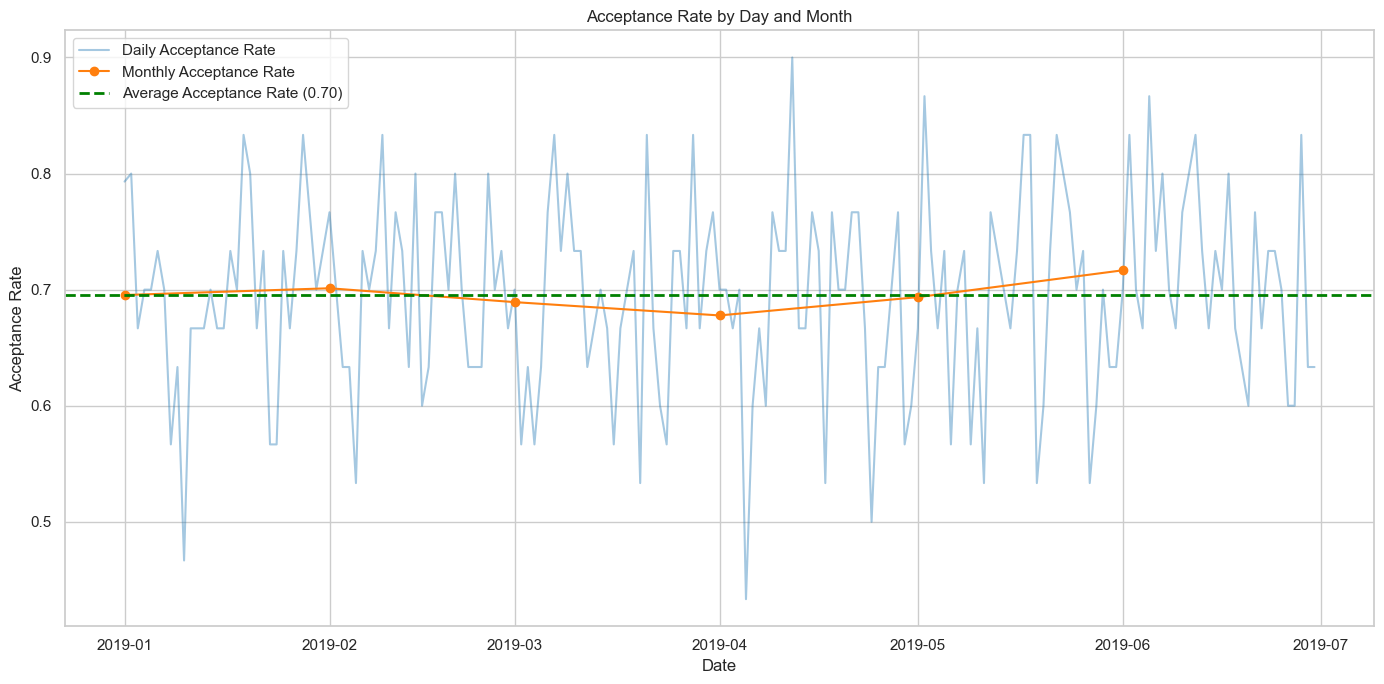

In [394]:

# Acceptance rate by Day
df['day'] = df['date_time'].dt.date
acceptance_rate_by_day = df.groupby('day').agg(total_transactions=('state', 'count'),
                                     accepted_transactions=('state', lambda x: (x == 'ACCEPTED').sum()))
acceptance_rate_by_day['acceptance_rate'] = acceptance_rate_by_day['accepted_transactions'] / acceptance_rate_by_day['total_transactions']
acceptance_rate_by_day['acceptance_rate']

# Acceptance rate by Mounth
df['month'] = df['date_time'].dt.to_period('M')
acceptance_rate_by_mouth = df.groupby('month').agg(total_transactions=('state', 'count'),
                                        accepted_transactions=('state', lambda x: (x == 'ACCEPTED').sum()))
acceptance_rate_by_mouth['acceptance_rate'] = acceptance_rate_by_mouth['accepted_transactions'] / acceptance_rate_by_mouth['total_transactions']

#Visualization

plt.figure(figsize=(14,7))

# Plot daily acceptance rate
plt.plot(acceptance_rate_by_day.index, acceptance_rate_by_day['acceptance_rate'], label='Daily Acceptance Rate', alpha=0.4, color='tab:blue')

# Plot monthly acceptance rate (align months to first day for plotting)
plt.plot(acceptance_rate_by_mouth.index.to_timestamp(), acceptance_rate_by_mouth['acceptance_rate'], label='Monthly Acceptance Rate', marker='o', color='tab:orange')

# Add average acceptance rate line
average_acceptance_rate = acceptance_rate_by_day['acceptance_rate'].mean()
plt.axhline(y=average_acceptance_rate, color='green', linestyle='--', linewidth=2, label=f'Average Acceptance Rate ({average_acceptance_rate:.2f})')

plt.title('Acceptance Rate by Day and Month')
plt.xlabel('Date')
plt.ylabel('Acceptance Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

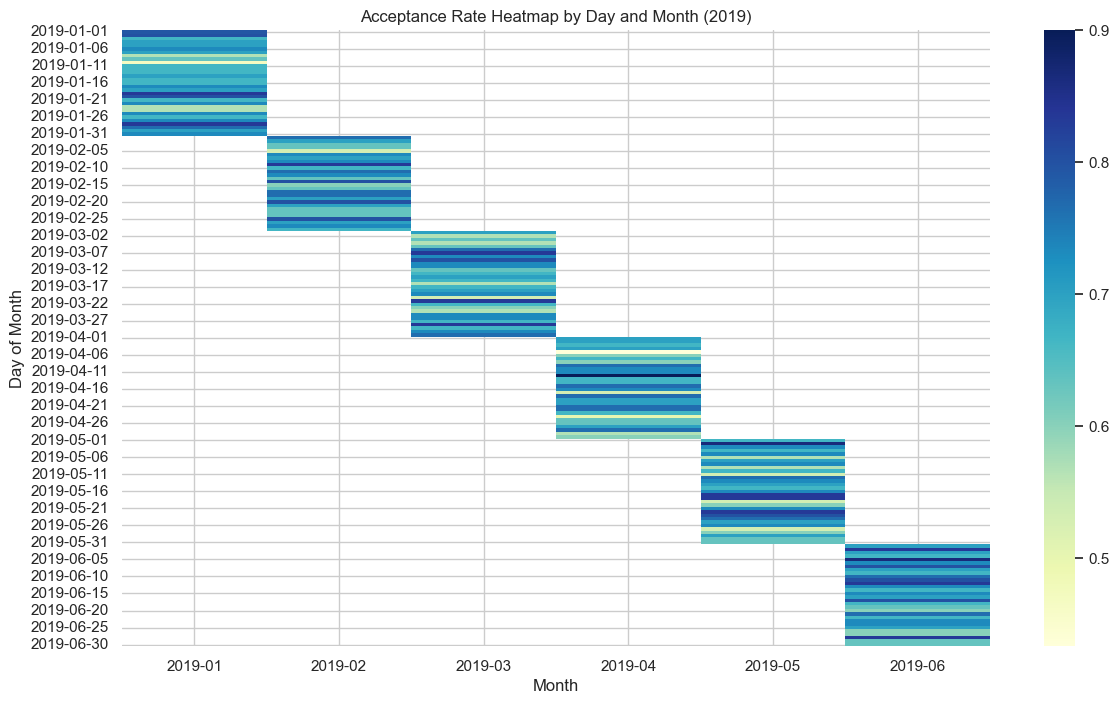

In [395]:
pivot = df.groupby(['month', 'day']).agg(
    total_transactions=('state', 'count'),
    accepted_transactions=('state', lambda x: (x == 'ACCEPTED').sum())
)
pivot['acceptance_rate'] = pivot['accepted_transactions'] / pivot['total_transactions']
heatmap_data = pivot['acceptance_rate'].unstack(level=0)  # days as rows, months as columns

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Acceptance Rate Heatmap by Day and Month (2019)')
plt.xlabel('Month')
plt.ylabel('Day of Month')
plt.show()



<small>

→**Observation:** We observe a noticeable dip in the acceptance rate between Fabraury and April, along with significant daily fluctuations throughout the entire period. This overall instability suggests potential underlying patterns or anomalies.

  **Action Required:**  Based on this, we will  concentrate our analysis on  the data of this decline period for better results.
</small>

In [396]:
 #Filter between Fabraury 1 and april 30, 2019
start_date = '2019-02-01'
end_date = '2019-04-30'
mask = (df['date_time'] >= start_date) & (df['date_time'] <= end_date)
df_feb_apr = df.loc[mask].copy()

df_feb_apr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2646 entries, 930 to 3595
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   external_ref  2646 non-null   object             
 1   status_x      2646 non-null   bool               
 2   source_x      2646 non-null   object             
 3   ref           2646 non-null   object             
 4   date_time     2646 non-null   datetime64[ns, UTC]
 5   state         2646 non-null   object             
 6   cvv_provided  2646 non-null   bool               
 7   amount        2646 non-null   float64            
 8   country       2646 non-null   object             
 9   currency      2646 non-null   object             
 10  rates         2646 non-null   object             
 11  status_y      2646 non-null   bool               
 12  source_y      2646 non-null   object             
 13  chargeback    2646 non-null   bool               
 14  day        

**2. Acceptance Rate Analysis**

We calculate the acceptance rate over time and by relevant dimensions (Country, currency, CVV provided).

               total_transactions  accepted_transactions  acceptance_rate
weekend_label                                                            
Weekday                      1866                   1297         0.695070
Weekend                       780                    530         0.679487


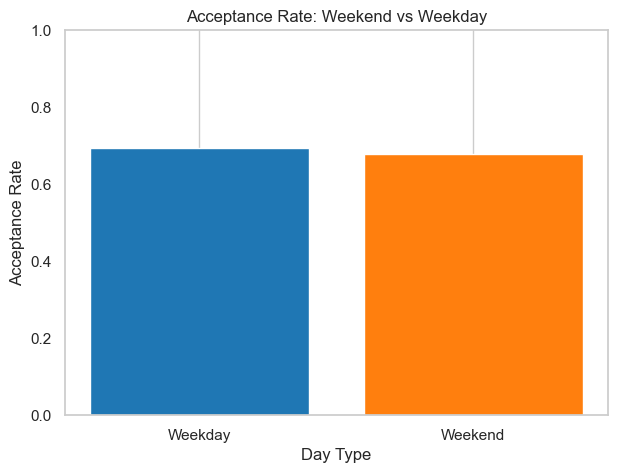

In [397]:
# Acceptance Rate: Weekend vs Weekday

# 0 = Monday, 6 = Sunday
df_feb_apr['is_weekend'] = df_feb_apr['date_time'].dt.weekday >= 5
df_feb_apr['weekend_label'] = df_feb_apr['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

#Calculate Acceptance Rate for Weekend vs. Weekday
weekend_stats = df_feb_apr.groupby('weekend_label').agg(
    total_transactions=('state', 'count'),
    accepted_transactions=('state', lambda x: (x == 'ACCEPTED').sum())
)
weekend_stats['acceptance_rate'] = weekend_stats['accepted_transactions'] / weekend_stats['total_transactions']
print(weekend_stats)


#Visualize the Comparison
plt.figure(figsize=(7,5))
plt.bar(weekend_stats.index, weekend_stats['acceptance_rate'], color=['tab:blue', 'tab:orange'])

plt.title('Acceptance Rate: Weekend vs Weekday')
plt.ylabel('Acceptance Rate')
plt.xlabel('Day Type')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


<small>

→**Observation:** 
- The acceptance rate remains nearly identical on weekends (68%) compared to weekdays (69%), showing no significant variation.
- Weekend activity does not appear to impact acceptance rates, suggesting consistent behavior across all days.

</small>

             total_transactions  accepted_transactions  acceptance_rate
day_of_week                                                            
Wednesday                   360                    239         0.663889
Saturday                    390                    262         0.671795
Friday                      390                    265         0.679487
Sunday                      390                    268         0.687179
Tuesday                     366                    253         0.691257
Monday                      390                    273         0.700000
Thursday                    360                    267         0.741667


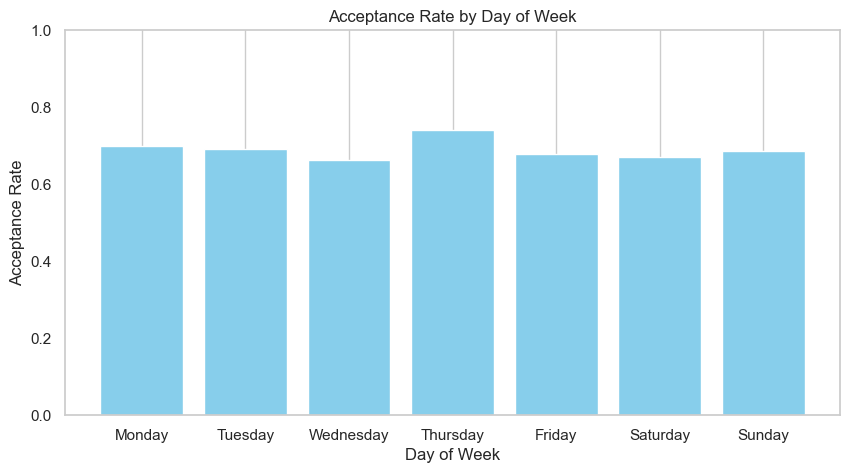

In [398]:
# Acceptance Rate by Day of Week

df_feb_apr['day_of_week'] = df_feb_apr['date_time'].dt.day_name()
dow_stats = df_feb_apr.groupby('day_of_week').agg(
    total_transactions=('state', 'count'),
    accepted_transactions=('state', lambda x: (x == 'ACCEPTED').sum())
)
dow_stats['acceptance_rate'] = dow_stats['accepted_transactions'] / dow_stats['total_transactions']

# To order days correctly:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dow_stats = dow_stats.reindex(ordered_days)
dow_stats_sorted = dow_stats.sort_values('acceptance_rate')

print(dow_stats_sorted)

plt.figure(figsize=(10,5))
plt.bar(dow_stats.index, dow_stats['acceptance_rate'], color='skyblue')
plt.title('Acceptance Rate by Day of Week')
plt.ylabel('Acceptance Rate')
plt.xlabel('Day of Week')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


<small>

→**Observation:** 
- we can observe that the  acceptance rate over the day of the week is the nearly the same : between 66% and 74%
</small>

         total_transactions  accepted_transactions  acceptance_rate
country                                                            
US                      441                    294         0.666667
MX                      441                    298         0.675737
AE                      441                    299         0.678005
CA                      441                    308         0.698413
UK                      441                    308         0.698413
FR                      441                    320         0.725624


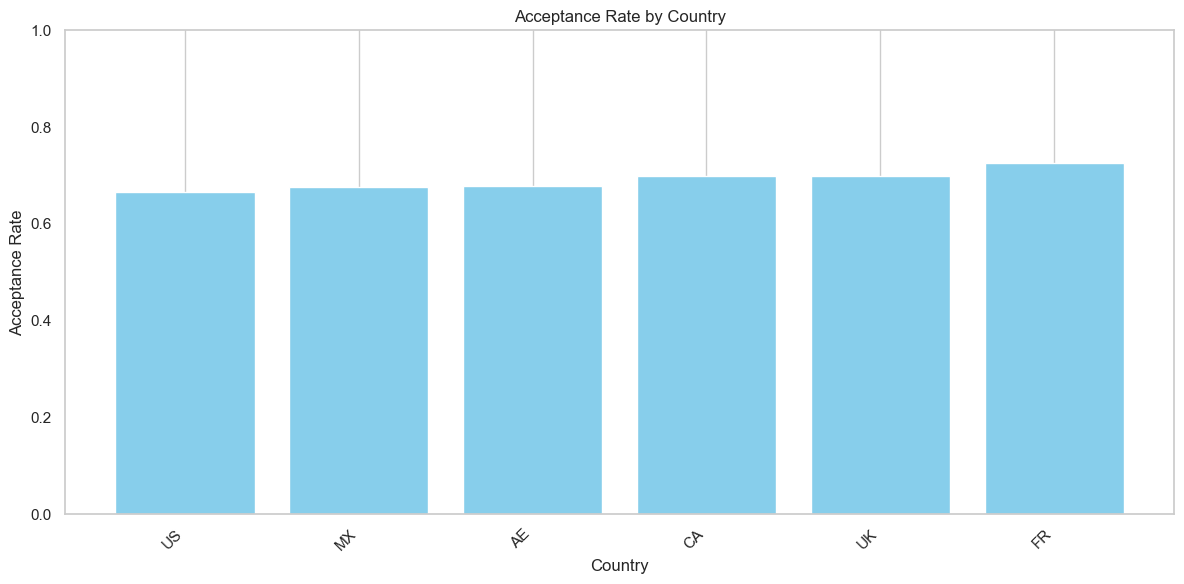

In [399]:
#Acceptance Rate by Country
country_stats = df_feb_apr.groupby('country').agg(
    total_transactions=('state', 'count'),
    accepted_transactions=('state', lambda x: (x == 'ACCEPTED').sum())
)
country_stats['acceptance_rate'] = country_stats['accepted_transactions'] / country_stats['total_transactions']

# Sort countries by acceptance rate ascending
country_stats_sorted = country_stats.sort_values('acceptance_rate')

print(country_stats_sorted)

#Visualization
plt.figure(figsize=(12,6))
plt.bar(country_stats_sorted.index, country_stats_sorted['acceptance_rate'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Acceptance Rate by Country')
plt.xlabel('Country')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



<small>

→**Observation:** 
- we can observe that the  acceptance rate in US is the lowest with 67%,  MX and AE with 68%, canada and UK with 70% and FR with the highest rate 73% . which are so close
</small>

Index([False, True], dtype='bool', name='cvv_provided')


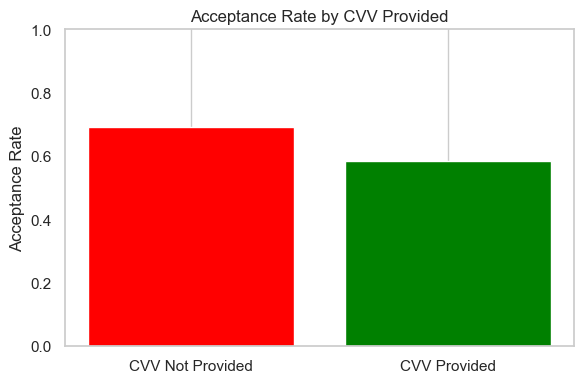

In [400]:
# Acceptance Rate by CVV provided
cvv_stats = df_feb_apr.groupby('cvv_provided').agg(
    total_transactions=('state', 'count'),
    accepted_transactions=('state', lambda x: (x == 'ACCEPTED').sum())
)
cvv_stats['acceptance_rate'] = cvv_stats['accepted_transactions'] / cvv_stats['total_transactions']

#print(cvv_stats[['total_transactions', 'accepted_transactions', 'acceptance_rate']])


# Define mappings for labels and colors
label_map = {True: 'CVV Provided', False: 'CVV Not Provided'}
color_map = {True: 'green', False: 'red'} 

# Generate labels and colors dynamically from cvv_stats index
labels = [label_map[val] for val in cvv_stats.index]
colors = [color_map[val] for val in cvv_stats.index]

# Visualize acceptance rate by CVV provided or not
plt.figure(figsize=(6,4))
print(cvv_stats.index)
plt.bar(labels, cvv_stats['acceptance_rate'], color=colors)
plt.title('Acceptance Rate by CVV Provided')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()

<small>

→**Observation:** 
- we can observe that the transactions with no cvv are not affecting the acceptance rate. that's possible due to tokenized or saved card transactions, which it could be logical.
</small>

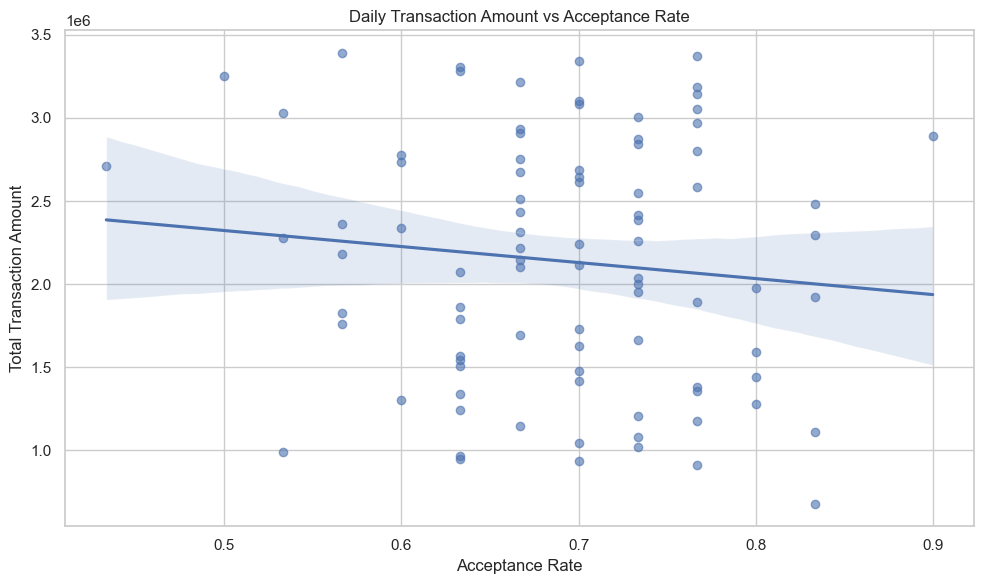

In [401]:
# Acceptance Rate by  transaction amount

daily_stats = df_feb_apr.groupby('day').agg(
    total_amount=('amount','sum'),
    accepted_transactions=('state', lambda x: (x == 'ACCEPTED').sum()),
    total_transactions=('state', 'count')
)
daily_stats['acceptance_rate'] = daily_stats['accepted_transactions'] / daily_stats['total_transactions']

# Step 2: Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=daily_stats, x='acceptance_rate', y='total_amount', scatter_kws={'alpha': 0.6})
plt.title('Daily Transaction Amount vs Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

<small>

→**Key observations:** 
- The plot displays a slight negative correlation between the daily acceptance rate (x-axis) and the total transaction amount (y-axis). This means that, in general, as the acceptance rate increases, the total transaction amount tends to decrease a bit, and vice versa.
- On days with larger total transaction amounts, there may be more high-value transactions. Payment processors may apply stricter rules or manual reviews to days with unusually high volumes, causing more declines and reducing the acceptance rate.
</small>


**3. Chargeback Analysis:**

We analyze the frequency and distribution of chargebacks to see if they correlate with acceptance rate declines.

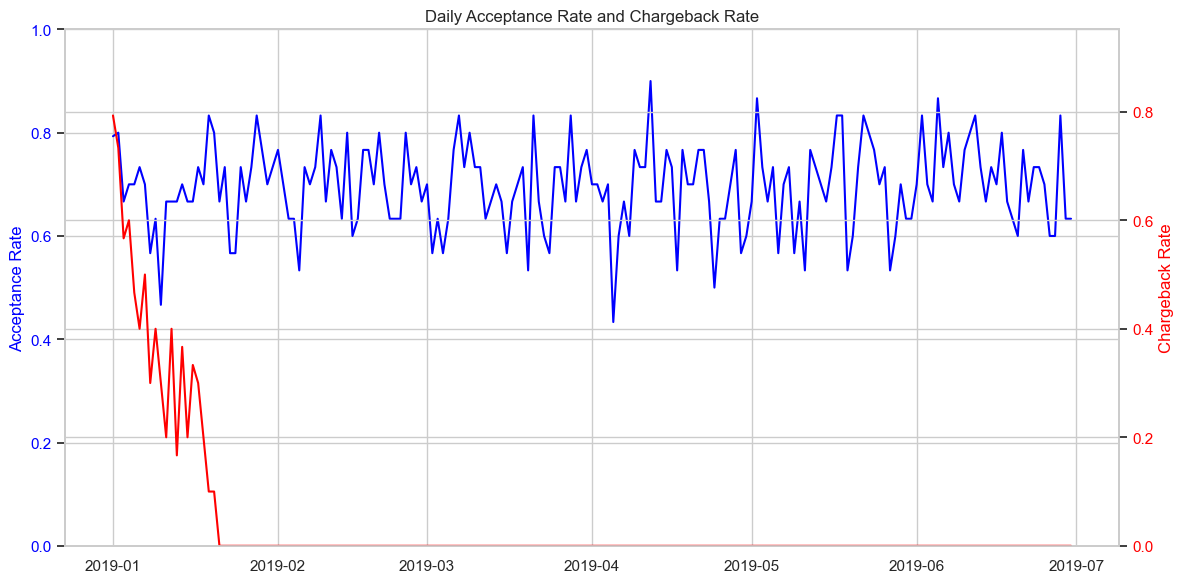

In [402]:
#cheking if the Chargebacks are affecting the Acceptance Rate

# Calculating the daily acceptance rate and the daily chargeback rate
daily_stats = df.groupby('day').agg(
    total_transactions=('state', 'count'),
    accepted_transactions=('state', lambda x: (x.str.upper() == 'ACCEPTED').sum()),
    chargebacks=('chargeback', 'sum')
)

daily_stats['acceptance_rate'] = daily_stats['accepted_transactions'] / daily_stats['total_transactions']
daily_stats['chargeback_rate'] = daily_stats['chargebacks'] / daily_stats['total_transactions']

# Plot acceptance and chargeback rates over time
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(daily_stats.index, daily_stats['acceptance_rate'], color='blue', label='Acceptance Rate')
ax1.set_ylabel('Acceptance Rate', color='blue')
ax1.set_ylim(0,1)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(daily_stats.index, daily_stats['chargeback_rate'], color='red', label='Chargeback Rate')
ax2.set_ylabel('Chargeback Rate', color='red')
ax2.set_ylim(0, daily_stats['chargeback_rate'].max()*1.2)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Daily Acceptance Rate and Chargeback Rate')
fig.tight_layout()
plt.show()




<small>

→**Key observations:** 
- we can observe a high chargeBack rate before the Start of the declining acceptance rate, which can be the cause of the acceptance rate decline period (march-april). which can causing Globepay to tighten fraud controls, leading to more declines.
- we can not confirm that , because we have only the jaunary data, but it could be helful.
</small>


**4. Rate Calculations:**

Check if there are a Technical Failures in Rate Calculations

In [403]:
import json
# List to store indices where currency is not found in rate keys
mismatch_indices = []

# Loop through DataFrame rows
for idx, row in df.iterrows():
    # Parse the JSON string in the 'rates' column
    rate_dict = json.loads(row['rates'])

    # Extract currency from the 'currency' column
    currency = row['currency']
    
    # Check if currency exists in the rate dictionary keys
    if currency not in rate_dict:
        mismatch_indices.append(idx)

print("Indices with currency mismatch:", mismatch_indices)

Indices with currency mismatch: []




<small>

→**observation:** 
-this shows that all the transactinos had thier rate exchange no matter the currency.
</small>

